<a href="https://colab.research.google.com/github/DLPY/Classification_Session_2/blob/main/Logistic_Regression_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Pandas, Pyplot and Read data

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_colwidth', None)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# CSV is first read in from a github raw file another option is to import the notebook to your session storage by click on the file icon on left toolbar then importing csv
! wget https://raw.githubusercontent.com/DLPY/Classification_Session_2/main/Student2020.csv

--2022-01-25 17:08:41--  https://raw.githubusercontent.com/DLPY/Classification_Session_2/main/Student2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113427 (111K) [text/plain]
Saving to: ‘Student2020.csv’

Student2020.csv     100%[===================>] 110.77K  --.-KB/s    in 0.02s   

2022-01-25 17:08:41 (4.86 MB/s) - ‘Student2020.csv’ saved [113427/113427]



In [35]:
# Once we have the csv file pd.read_csv() converts it to a pandas dataframe
df = pd.read_csv('Student2020.csv')

2. Investigating the Data and exploration

In [36]:
df.head(5)

,age,Auditory,Kinaesthetic,Visual,ExtrinsicMotivation,IntrinsicMotivation,SelfEfficacy,StudyTime,Conscientiousness,CAOpoints,Maths,English,Pass
0,19,5.000000,6.698392,3.301608,9.308199,6.875000,7.321865,7.790997,8.721329,352,19,45,Pass
1,31,6.285538,2.500000,6.214462,7.535538,6.303307,7.095179,6.892769,6.440564,187,35,28,Pass
2,36,6.776966,2.500000,5.723034,8.026966,7.040449,7.258989,7.138483,6.194850,111,21,17,Pass
3,22,6.756132,3.987737,4.256132,6.621934,5.945164,5.089465,2.500000,4.042689,327,36,46,Fail
4,23,7.228655,2.228655,5.542690,6.453509,6.942836,6.285575,3.314034,4.528460,274,33,35,Fail


In [38]:
# check types, nulls and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1131 non-null   int64  
 1   Auditory             1131 non-null   float64
 2   Kinaesthetic         1131 non-null   float64
 3   Visual               1131 non-null   float64
 4   ExtrinsicMotivation  1131 non-null   float64
 5   IntrinsicMotivation  1131 non-null   float64
 6   SelfEfficacy         1131 non-null   float64
 7   StudyTime            1131 non-null   float64
 8   Conscientiousness    1131 non-null   float64
 9   CAOpoints            1131 non-null   int64  
 10  Maths                1131 non-null   int64  
 11  English              1131 non-null   int64  
 12  Pass                 1131 non-null   object 
dtypes: float64(8), int64(4), object(1)
memory usage: 115.0+ KB


In [39]:
# investigate the variability of the numeric columns
df.describe()

,age,Auditory,Kinaesthetic,Visual,ExtrinsicMotivation,IntrinsicMotivation,SelfEfficacy,StudyTime,Conscientiousness,CAOpoints,Maths,English
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,23.398762,3.351526,4.359359,7.289115,7.843591,7.074436,6.845598,6.186959,6.034330,303.349248,35.271441,42.763926
std,5.996987,1.699769,1.983298,1.777363,1.080476,1.085183,1.257891,1.966457,1.322592,151.254726,23.337077,23.936272
min,18.000000,0.000000,0.000000,0.327191,3.185380,2.510989,2.033927,1.029210,2.628583,0.000000,0.000000,0.000000
25%,19.000000,2.500000,2.750839,6.124360,7.150790,6.288684,5.913076,4.591726,5.134774,206.000000,16.000000,25.000000
50%,21.000000,2.911785,4.748377,7.500000,7.766083,7.099938,6.854952,6.033153,5.901921,326.000000,35.000000,44.000000
75%,26.000000,4.637668,5.538056,8.472952,8.608923,7.770700,7.500000,7.665651,6.789817,416.500000,54.000000,62.500000
max,59.000000,9.408472,9.876212,10.000000,10.000000,9.974213,10.000000,10.000000,9.956247,625.000000,100.000000,100.000000


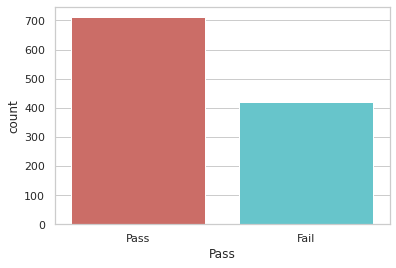

In [41]:
df.Pass.value_counts()
sns.countplot(x='Pass', data=df, palette='hls')
plt.show()

In [47]:
Fail = len(df[df['Pass']=='Fail'])
Pass = len(df[df['Pass']=='Pass'])
pct_of_fail = Fail/(Fail+Pass)
print("percentage of fail is", pct_of_fail*100)
pct_of_pass = Pass/(Fail+Pass)
print("percentage of subscription", pct_of_pass*100)

percentage of fail is 37.13527851458886
percentage of subscription 62.864721485411145


3. Split the data to prepare training and testing sets

In [48]:
# Independent Variable
X = df.drop(['Pass'], axis=1).values

# Depenedent Variable
y = df.Pass.values

# Split Observations in 80% training set 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
print('Training Data:', X_train.shape, y_train.shape)
print('Testing Data:', X_test.shape, y_test.shape)

Training Data: (904, 12) (904,)
Testing Data: (227, 12) (227,)


4. Train the model

In [49]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [50]:
# Coefficient and Intercept
print(logreg.coef_)
print(logreg.intercept_)

[[ 0.07421593 -0.42970189 -0.47664721 -0.22024866  0.06168526  0.44579247
  -0.130044    0.0127589  -0.01322267  0.00107667  0.02089038  0.00486127]]
[-0.07547209]


In [59]:
# Create dataframe from regressor coefficient to display results in a dataframe
column_names = ['age', 'Auditory', 'Kinaesthetic', 'Visual', 'ExtrinsicMotivation', 'IntrinsicMotivation', 'SelfEfficacy', 'StudyTime', 'Conscientiousness', 'CAOpoints', 'Maths', 'English']
coefficient_df = pd.DataFrame(logreg.coef_) # T - Transpose dataframe rows to columns
coefficient_df.columns = column_names
coefficient_df

,age,Auditory,Kinaesthetic,Visual,ExtrinsicMotivation,IntrinsicMotivation,SelfEfficacy,StudyTime,Conscientiousness,CAOpoints,Maths,English
0,0.074216,-0.429702,-0.476647,-0.220249,0.061685,0.445792,-0.130044,0.012759,-0.013223,0.001077,0.02089,0.004861


5. Predict the test values and calculate error

In [60]:
# Predict test set from model built during training 
y_pred = logreg.predict(X_test)

In [63]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)